In [1]:
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.model_selection import train_test_split

In [2]:
with open('all_images.txt') as f:
    lines = f.read().splitlines()

In [3]:
labels = [line.split('\t')[1] for line in lines]
counter = Counter(labels)

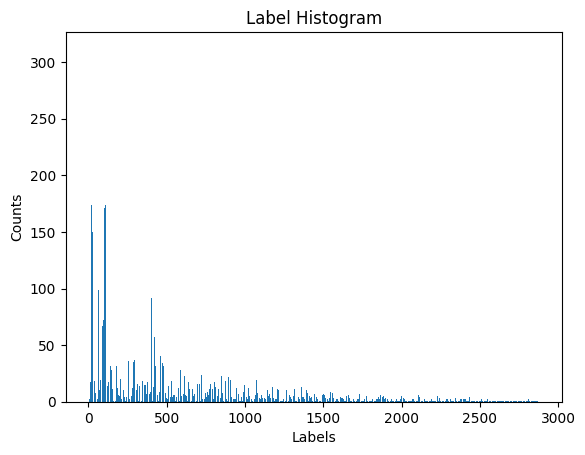

In [4]:
counts = counter.values()
plt.bar(range(len(counts)), counts)
plt.xlabel('Labels')
plt.ylabel('Counts')
plt.title('Label Histogram')
plt.show()

In [43]:
filter_counter = {k: v for k, v in counter.items() if v < 10} # TODO
filter_labels = list(filter_counter.keys()) + ['Nom-Script']
new_lines = [line for line in lines if line.split('\t')[1] not in filter_labels]
labels = [line.split('\t')[1] for line in new_lines]
filenames = [line.split('\t')[0] for line in new_lines]

In [44]:
label_to_index = {label: index for index, label in enumerate(labels)}
# labels = [label_to_index[label] for label in labels]

In [45]:
train_filenames, test_filenames, train_labels, test_labels = train_test_split(
    filenames, labels, test_size=0.3, stratify=labels, # TODO
)

In [46]:
with open('NomOCR_train.txt', 'w') as f:
    train_data = [filename + '\t' + str(label) for filename, label in zip(train_filenames, train_labels)]
    f.write('\n'.join(train_data).rstrip())

In [47]:
with open('NomOCR_test.txt', 'w') as f:
    test_data = [filename + '\t' + str(label) for filename, label in zip(test_filenames, test_labels)]
    f.write('\n'.join(test_data).rstrip())